In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt

from util.visualization import visualize_occupancy


In [3]:
def visualize_shape(root, epoch, iteration):
    with open(os.path.join(root, 'e_{}_i_{}.npy'.format(epoch, iteration)), 'rb') as fp:
        occ_grid = np.load(fp)
    visualize_occupancy(occ_grid, flip_axes=True)

In [14]:
with open('config.yaml') as fp:
    config = yaml.load(fp, Loader=SafeLoader)
config    


{'epoch': 500,
 'batch_size': 64,
 'dim': 32,
 'latent_len': 256,
 'g_lr': 0.0025,
 'd_lr': 0.001,
 'soft_label': True,
 'beta': 0.5,
 'lrsh': True,
 'd_acc_thres': 0.8,
 'output_dir': 'outputs',
 'shape_dir': 'outputs/shapes',
 'out_model_dir': 'outputs/models',
 'out_d_loss_dir': 'outputs/d_loss',
 'out_g_loss_dir': 'outputs/g_loss',
 'out_d_fake_loss_dir': 'outputs/d_fake_loss',
 'out_d_real_loss_dir': 'outputs/d_real_loss',
 'out_d_acc_dir': 'outputs/d_acc',
 'out_d_fake_acc_dir': 'outputs/d_fake_acc',
 'out_d_real_acc_dir': 'outputs/d_real_acc'}

In [15]:
out_d_loss_dirs = os.listdir(config["out_d_loss_dir"])
out_g_loss_dirs = os.listdir(config["out_g_loss_dir"])
out_d_fake_loss_dirs = os.listdir(config["out_d_fake_loss_dir"])
out_d_real_loss_dirs = os.listdir(config["out_d_real_loss_dir"])
out_d_acc_dirs = os.listdir(config["out_d_acc_dir"])
out_d_fake_acc_dirs = os.listdir(config["out_d_fake_acc_dir"])
out_d_real_acc_dirs = os.listdir(config["out_d_real_acc_dir"])


In [16]:
metric_dirs = ["out_d_loss_dir", "out_g_loss_dir", "out_d_fake_loss_dir", "out_d_real_loss_dir", 
          "out_d_acc_dir", "out_d_fake_acc_dir", "out_d_real_acc_dir"]

metrics = {"d_loss": [],
          "g_loss": [],
          "d_fake_loss": [],
          "d_real_loss": [],
          "d_acc": [],
          "d_fake_acc": [],
          "d_real_acc": []}

for m in metric_dirs:
    file_list = os.listdir(config[m])
    for file in file_list:
        data = np.load(os.path.join(config[m], file))
        metric_key = "_".join(m.split("_")[1:-1])
        metrics[metric_key].append(np.mean(data))

In [17]:
for k in metrics.keys():
    metrics[k] = np.array(metrics[k])

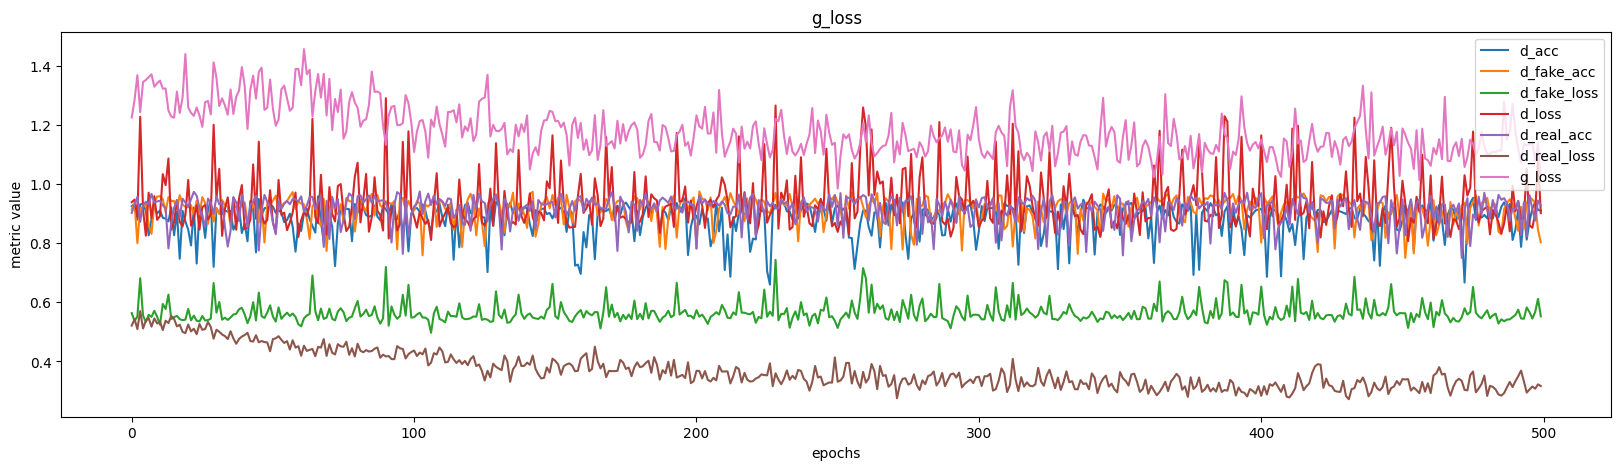

In [18]:
plt.figure(figsize=(20, 5))
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('metric value')

metrics_keys = list(metrics.keys())
metrics_keys.sort()

for m in metrics_keys:
    # Set a title 
    plt.title(m)
    # Display the figure.
    plt.plot(list(range(len(metrics[m]))), metrics[m], label=m)

plt.legend()
plt.savefig("outputs/metrics.png")

In [21]:
root = "outputs/shapes"
epoch = 350
iterations = np.random.choice(list(range(0,84,4)), 10)
for i in iterations:
    visualize_shape(root, epoch, i)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
import os

os.makedirs("output_model", exist_ok=True)
os.system("scp outputs/models/G_350.pth output_mod")